# EDA with python and applying Logistic Regression

#### Here we will be working with the Titanic Data Set from Kaggle.  This is a very famous data set and very offten is a student first step in Machiene Learning.

#### we will try to predict a classification-survival or deceased. 

#### we will use semi-cleaned version of the titanic data set, if you use the data set hosted directlyon kaggle, you may need to do some additional cleaning not shown in this lecture notebook.





# Import libraries

#### Let's import some libraries to get started

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# The data

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing data

### We can use seaborn to create a simple heatmap to see where are the missing data (NAN value).


In [3]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

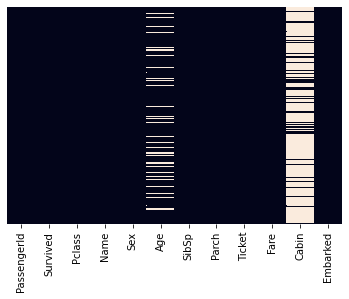

In [4]:
sb.heatmap(train.isnull(), yticklabels=False, cbar = False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

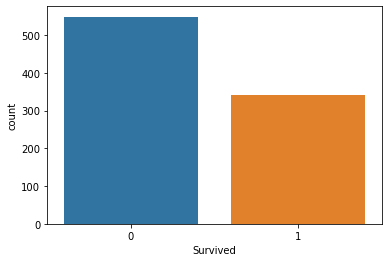

In [5]:
sb.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

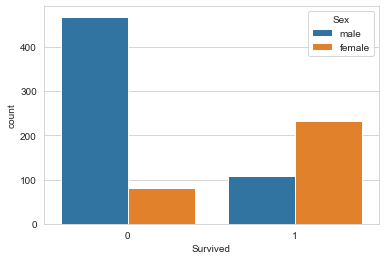

In [6]:
sb.set_style('whitegrid')
sb.countplot(x = 'Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

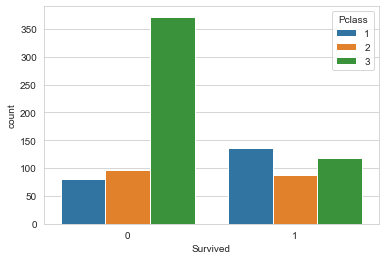

In [7]:
sb.set_style('whitegrid')
sb.countplot(x = 'Survived', hue='Pclass', data=train)

C:\Users\neete\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

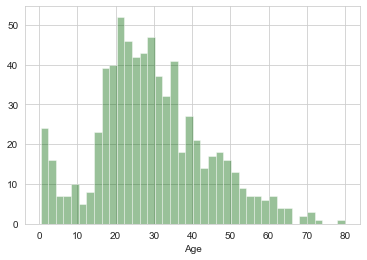

In [8]:
sb.distplot(train['Age'].dropna(), kde=False, color='darkgreen', bins=40)


# Data Cleaning

   #### We want to fill missing age data instead of just dropping the missing age data row. One way to do this is by filling in the mean age of all the passengers (impulation). However we can be smarter about this and check the average age by passengers class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

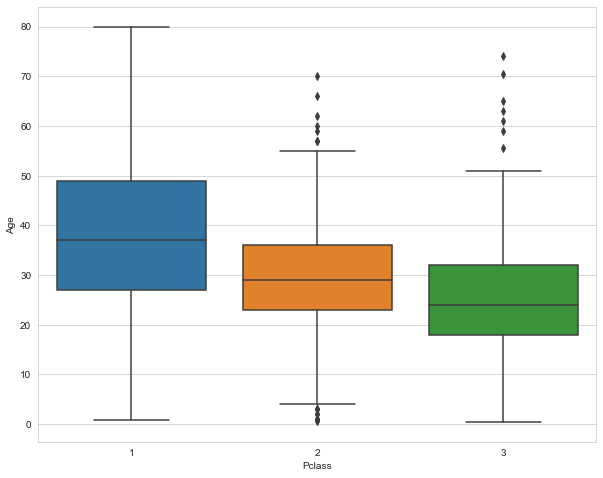

In [9]:
plt.figure(figsize=(10, 8))
sb.boxplot(x='Pclass', y='Age', data=train)

In [10]:
def set_age(cols):
    Age = cols[0]
   
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
            

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

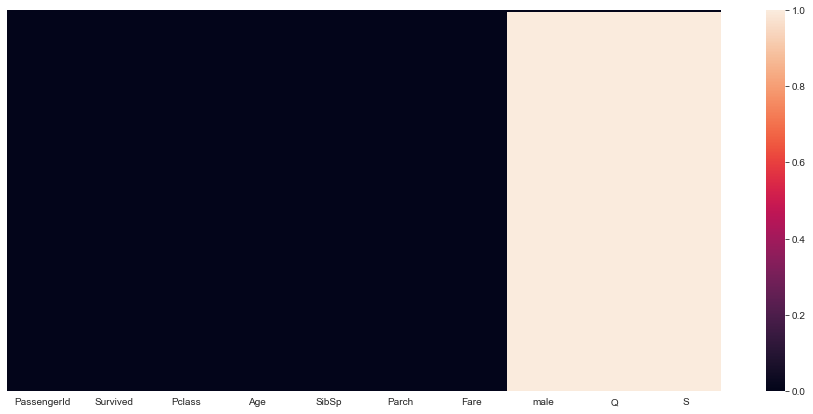

In [42]:
train['Age'].astype(str).astype(float)
train['Age'] = train[['Age', 'Pclass']].apply(set_age, axis=1)
plt.figure(figsize=(16, 7))
sb.heatmap(train.isnull(), yticklabels=False )

train['Age'].head()

<AxesSubplot:>

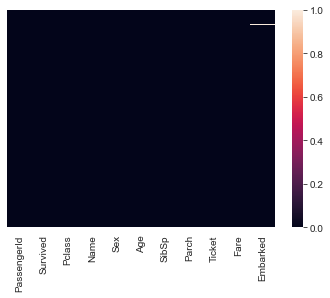

In [12]:
train.drop('Cabin', axis=1, inplace=True)

sb.heatmap(train.isnull(), yticklabels=False )

# Converting categorical features

#### We'll need to convert categorical feature to dummy variables using pandas! Otherwise our machiene learning algorithm won't be able to directly take in those feature as inputs.

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [14]:
embark = pd.get_dummies(train['Embarked'], drop_first=True).head()

In [15]:
sex = pd.get_dummies(train['Sex'], drop_first=True).head()

In [16]:
train.drop(['Sex','Embarked','Name', 'Ticket'], axis=1, inplace=True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [18]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


   # Building a logistic Regression model
   
   #### Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

# Train test split

In [36]:
train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [35]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [25]:
conda install scikit-learn


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\neete\anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.0.1               |     pyhd3eb1b0_0         208 KB
    scikit-learn-0.24.2        |   py38hf11a4ad_1         4.8 MB
    threadpoolctl-2.2.0        |     pyhbf3da8f_0          16 KB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-1.0.1-pyhd3eb1b0_0
  scikit-learn       pkgs/main/win-64::scikit-learn-0.24.2-py38hf11a4ad_1
  threadpoolctl      pkgs/main/noarch::threadpoolctl-2.2.0-pyhbf3da8f_0




joblib-1.0.1         | 208 KB    |            |   0% 
joblib-1.0.1         | 208 KB    | 7          |   8% 
job

In [26]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

# Training and predicting


In [38]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').